In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.feature_selection import SelectFromModel

In [25]:
# Load the data
file_path = Path("../Resources/Source_data/FW_Veg_Rem_Combined.csv")
fires_df = pd.read_csv(file_path)
fires_df = fires_df[["fire_size","fire_size_class","state","Vegetation","Temp_pre_30","Temp_pre_15","Temp_pre_7","Temp_cont","Wind_pre_30","Wind_pre_15","Wind_pre_7","Wind_cont","Hum_pre_30","Hum_pre_15","Hum_pre_7","Hum_cont","Prec_pre_30","Prec_pre_15","Prec_pre_7","Prec_cont","remoteness"]].copy()
fires_df = fires_df[fires_df["state"]=="CA"]
fires_df = fires_df[fires_df["Temp_pre_30"]>0]
fires_df = fires_df[fires_df["Temp_pre_15"]>0]
fires_df = fires_df[fires_df["Temp_pre_7"]>0]
fires_df = fires_df[fires_df["Temp_cont"]>0]
fires_df = fires_df[fires_df["Wind_pre_30"]>0]
fires_df = fires_df[fires_df["Wind_pre_15"]>0]
fires_df = fires_df[fires_df["Wind_pre_7"]>0]
fires_df = fires_df[fires_df["Wind_cont"]>0]
fires_df = fires_df[fires_df["Hum_pre_30"]>0]
fires_df = fires_df[fires_df["Hum_pre_15"]>0]
fires_df = fires_df[fires_df["Hum_pre_7"]>0]
fires_df = fires_df[fires_df["Hum_cont"]>0]
fires_df = fires_df[fires_df["Prec_pre_30"]>-1]
fires_df = fires_df[fires_df["Prec_pre_15"]>-1]
fires_df = fires_df[fires_df["Prec_pre_7"]>-1]
fires_df = fires_df[fires_df["Prec_cont"]>-1]
fires_df.head(10)

,fire_size,fire_size_class,state,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
78,450.0,E,CA,16,27.850483,28.165097,28.499405,33.900000,2.580000,2.664543,...,2.237500,44.706207,42.983379,49.000000,39.375000,0.0,0.0,0.0,0.0,0.472150
88,3.0,B,CA,15,19.685119,19.242174,19.495294,19.063744,3.893413,3.755263,...,3.751422,67.688935,68.160550,64.461538,66.811705,0.0,0.0,0.0,0.0,0.501750
192,1.0,B,CA,14,11.748991,13.265223,15.781065,14.750000,1.548318,1.497429,...,1.102083,61.600837,60.522481,58.560897,62.888889,2.5,2.5,0.0,0.0,0.501108
274,1.3,B,CA,16,18.601678,17.351402,17.417453,13.176536,1.935570,2.238318,...,2.894382,58.164848,52.572127,50.336788,68.926554,0.0,0.0,0.0,27.9,0.461236
302,5.0,B,CA,12,17.951613,17.726636,18.071066,19.908578,2.254147,2.099766,...,1.995372,73.609502,74.295508,73.903553,79.306030,2.9,1.5,0.6,2.1,0.466788
309,2.0,B,CA,0,4.610849,5.639908,7.474468,8.600308,1.652524,1.367890,...,2.131963,72.852975,70.987654,76.985714,78.735746,12.2,3.8,3.8,49.1,0.499333
394,1.0,B,CA,0,16.092461,19.914530,21.184049,23.756098,3.233091,3.683086,...,4.056860,57.811463,45.103343,34.831081,43.171200,29.2,0.0,0.0,0.0,0.501295
436,1.0,B,CA,0,26.329749,28.340288,30.689062,28.071181,2.667626,2.358993,...,2.127778,33.115108,29.446043,27.703125,41.237762,0.0,0.0,0.0,0.0,0.497625
442,2.0,B,CA,0,22.488692,23.002949,20.030556,16.693987,2.714033,2.576944,...,2.174346,51.244202,50.099462,60.648045,55.608639,12.0,12.0,12.0,8.8,0.499643
453,1.0,B,CA,14,23.426667,27.206389,25.695833,26.551489,3.217222,2.839167,...,3.064965,43.815385,39.416667,42.446429,39.747518,21.0,0.0,0.0,3.0,0.520804


In [26]:
# Create data
X = fires_df.drop(columns=["fire_size_class","fire_size","state"])
y = fires_df["fire_size_class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
clf = RandomForestClassifier(random_state=4, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9992630803242447
Testing Score: 0.7660044150110376


[0.01603587 0.04830848 0.04979829 0.05097507 0.05736867 0.04832879
 0.04781818 0.04697104 0.05085    0.05085851 0.0499383  0.05153714
 0.06093558 0.02028393 0.01209824 0.00746423 0.01746119 0.31296849]


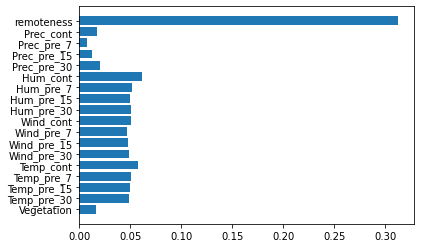

In [30]:
features = clf.feature_importances_
column_names = ["Vegetation","Temp_pre_30","Temp_pre_15","Temp_pre_7","Temp_cont","Wind_pre_30","Wind_pre_15","Wind_pre_7","Wind_cont","Hum_pre_30","Hum_pre_15","Hum_pre_7","Hum_cont","Prec_pre_30","Prec_pre_15","Prec_pre_7","Prec_cont","remoteness"]
print(features)
plt.barh(y = range(len(features)), width=features, tick_label=column_names)
plt.show()

In [24]:
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True])

In [25]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

/Users/remiharazim/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [26]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.6241709653647752
Testing Score: 0.6335540838852097


/Users/remiharazim/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7509211495946941
Testing Score: 0.7748344370860927
